<a href="https://colab.research.google.com/github/AmbrishPathak/ambrishpathak.github.io/blob/main/CS675_23452_Sp_2024_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

dtype_dict = {'Meter Number': 'O'}
df = pd.read_csv('/content/sample_data/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240505.csv',dtype=dtype_dict, low_memory=False)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'])

1) Since the time unit (day, month, year) varies from dataset to dataset, make your code
agnostic of the input. In other words, have your code to determine the unit of the time
series

In [ ]:
# Calculate time difference to identify time unit
time_diff = df['Revenue Month'].diff().min()

# Determine time unit based on time difference
if time_diff.days <= 1:
    time_unit = 'day'
elif time_diff.days <= 31:
    time_unit = 'month'
else:
    time_unit = 'year'

# Calculate mean consumption based on time unit
if time_unit == 'day':
    # Daily mean consumption
    mean_consumption = df['Consumption (KWH)'].mean()
    print(f'Daily Mean Consumption: {mean_consumption}')
elif time_unit == 'month':
    # Monthly mean consumption
    df['MonthYear'] = df['Revenue Month'].dt.to_period('M')
    monthly_mean = df.groupby('MonthYear')['Consumption (KWH)'].mean()
    print(f'Monthly Mean Consumption:\n{monthly_mean}')
else:
    # Yearly mean consumption
    df['Year'] = df['Revenue Month'].dt.year
    yearly_mean = df.groupby('Year')['Consumption (KWH)'].mean()
    print(f'Yearly Mean Consumption:\n{yearly_mean}')

Daily Mean Consumption: 31156.454968080758


2) Then, train your model (on the respective dataset) and predict the Electric
Consumption (EC) values from the last date of the dataset into X units of time into the
future.

a) The unit of time be day, then predict the EC for 100/200/365 days into
the future.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/2fdaxiwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/2gpqgfqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24525', 'data', 'file=/tmp/tmpcv0yp8zg/2fdaxiwi.json', 'init=/tmp/tmpcv0yp8zg/2gpqgfqv.json', 'output', 'file=/tmp/tmpcv0yp8zg/prophet_modelx1t7_siw/prophet_model-20240506215048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:50:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


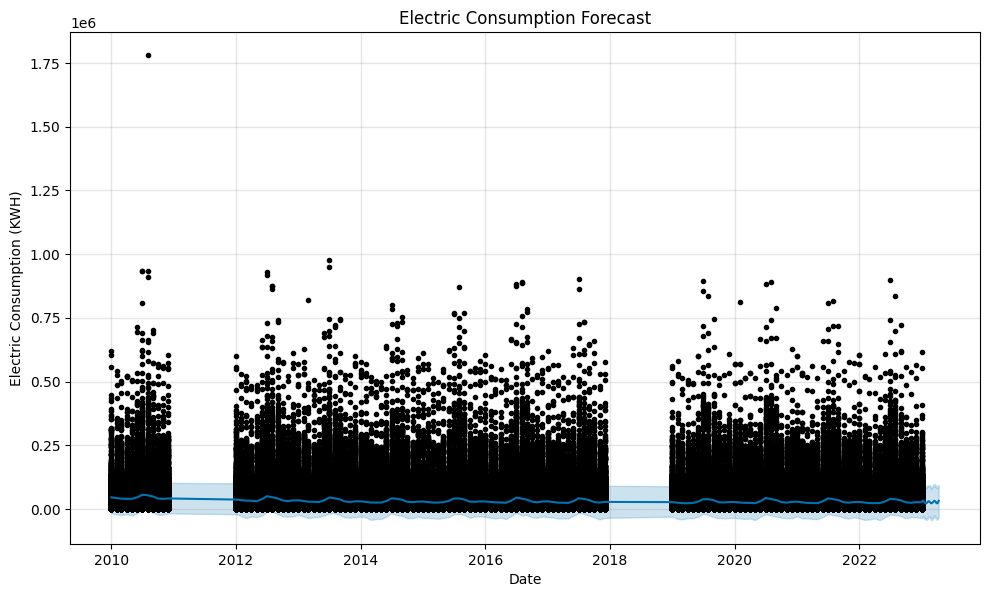

In [ ]:
df.rename(columns={'Revenue Month': 'ds', 'Consumption (KWH)': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet()

# Fit the model to your data
model.fit(df)

# Future predictions for 100 days
future = model.make_future_dataframe(periods=100)
forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_100_Days = df['y'].values[:100]
forecasted_values_100_Days = forecast['yhat'].values[:100]


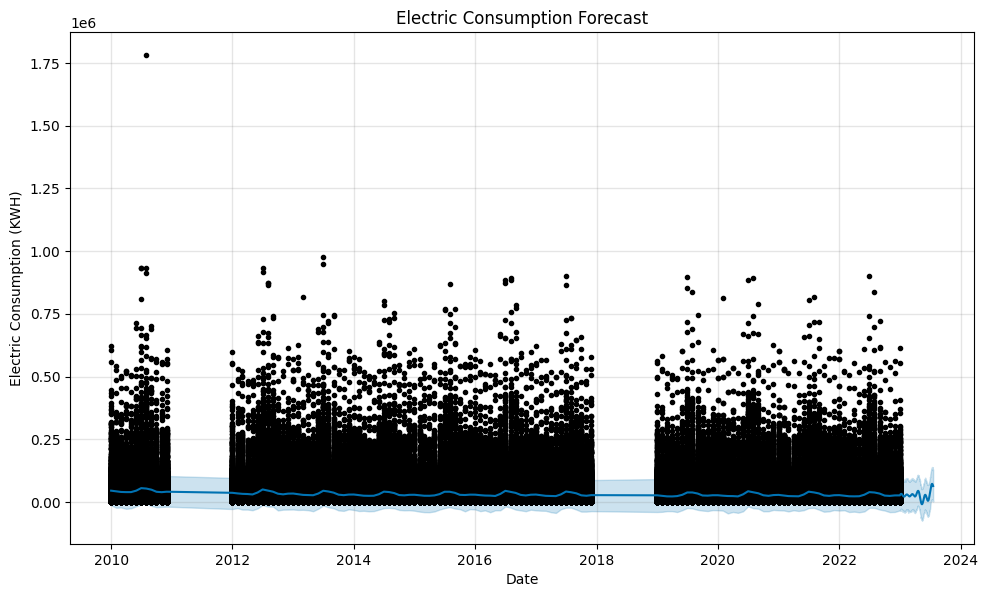

In [ ]:
# Future predictions for 200 days
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_200_Days = df['y'].values[:200]
forecasted_values_200_Days = forecast['yhat'].values[:200]

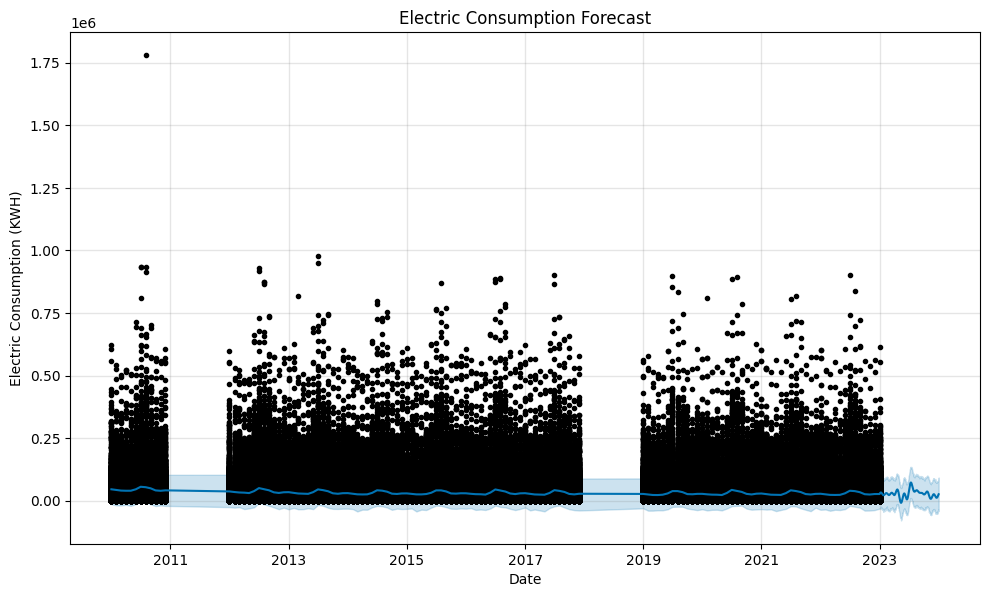

In [ ]:
# Future predictions for 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_365_Days = df['y'].values[:365]
forecasted_values_365_Days = forecast['yhat'].values[:365]

2.b)The unit of time be month, then predict the EC for 1/6/9 months into the future.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/mdygf_wt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/mwwcu6a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51644', 'data', 'file=/tmp/tmpcv0yp8zg/mdygf_wt.json', 'init=/tmp/tmpcv0yp8zg/mwwcu6a4.json', 'output', 'file=/tmp/tmpcv0yp8zg/prophet_modelfw9grtea/prophet_model-20240506223020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:30:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:30:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


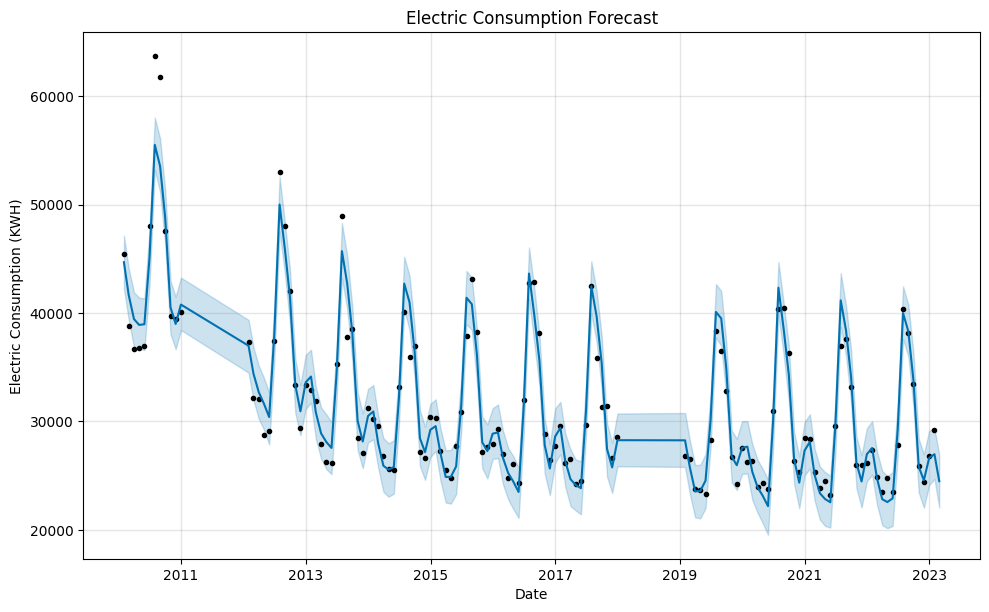

In [ ]:
dtype_dict = {'Meter Number': 'O'}
df = pd.read_csv('/content/sample_data/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240505.csv',dtype=dtype_dict, low_memory=False)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'])


numeric_columns = ['Revenue Month','Consumption (KWH)']
df_numeric = df[numeric_columns]

# Group by month and calculate mean for numeric columns
df_monthly = df_numeric.groupby(pd.Grouper(key='Revenue Month', freq='M')).mean().reset_index()

df_monthly.rename(columns={'Revenue Month': 'ds', 'Consumption (KWH)': 'y'}, inplace=True)

model = Prophet()

model.fit(df_monthly)

# Future predictions 1 month
future_1_month = model.make_future_dataframe(periods=1, freq='M')
forecast_1_month = model.predict(future_1_month)

# Plot forecasted data for 1 month
fig = model.plot(forecast_1_month)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()


# Extract actual and predicted values for evaluation (4)
actual_values_1_Month = df_monthly['y'].values[:1]
forecasted_values_1_Month = forecast['yhat'].values[:1]

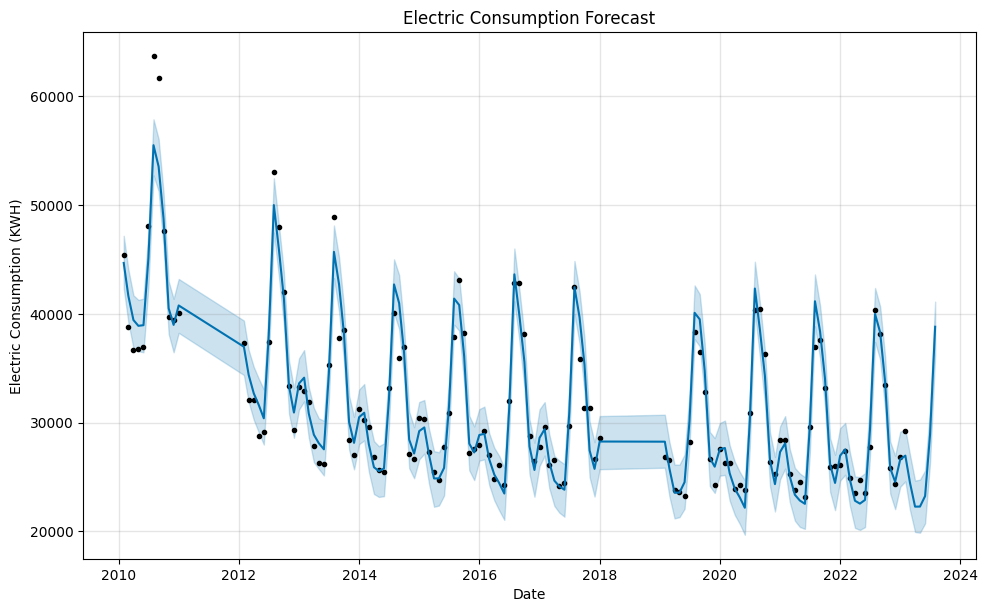

In [ ]:
# Future predictions 6 months
future_6_months = model.make_future_dataframe(periods=6, freq='M')
forecast_6_months = model.predict(future_6_months)

# Plot forecasted data for 6 months
fig = model.plot(forecast_6_months)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_6_Month = df_monthly['y'].values[:6]
forecasted_values_6_Month = forecast_6_months['yhat'].values[:6]

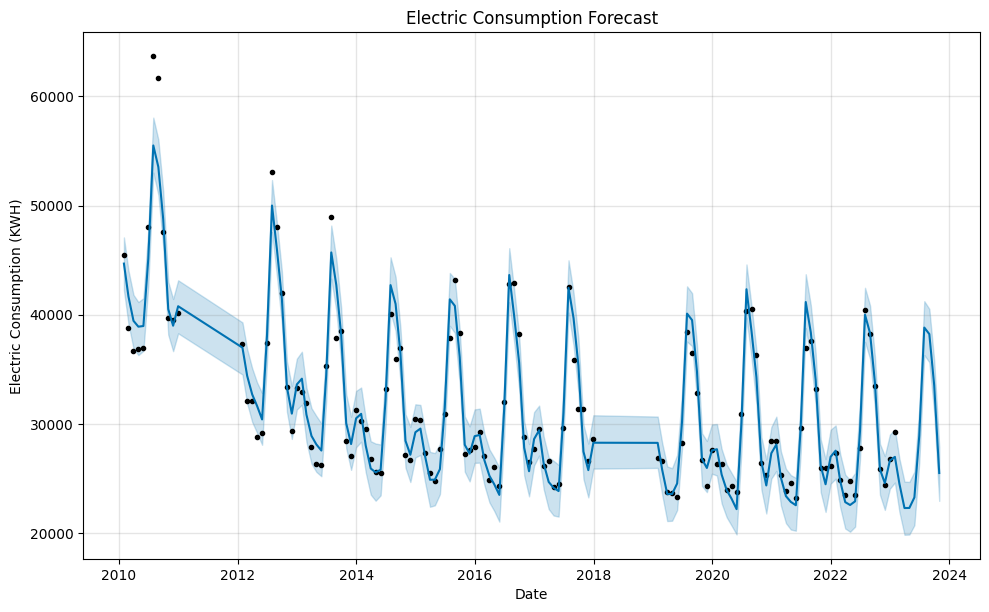

In [ ]:
# Future predictions 9 months
future_9_months = model.make_future_dataframe(periods=9, freq='M')
forecast_9_months = model.predict(future_9_months)

# Plot forecasted data for 9 months
fig = model.plot(forecast_9_months)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_9_Month = df_monthly['y'].values[:9]
forecasted_values_9_Month = forecast_9_months['yhat'].values[:9]

2. C) The unit of time be year, then predict the EC for 1/10/20 years into the future

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/6dmdgd0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/yi7vz4hs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31245', 'data', 'file=/tmp/tmpcv0yp8zg/6dmdgd0k.json', 'init=/tmp/tmpcv0yp8zg/yi7vz4hs.json', 'output', 'file=/tmp/tmpcv0yp8zg/prophet_modeltw9rr8rd/prophet_model-20240506223205.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

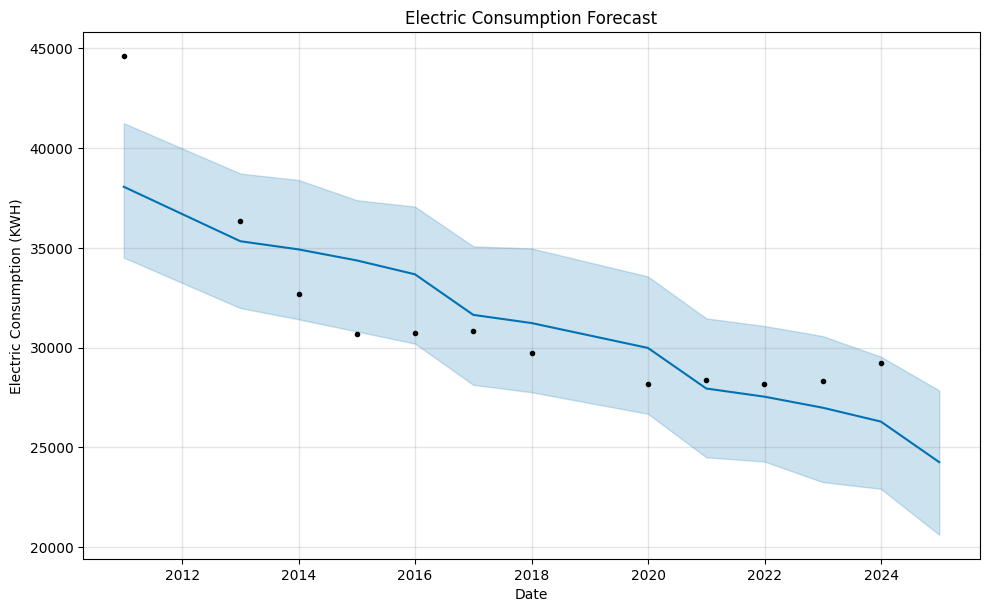

In [ ]:
dtype_dict = {'Meter Number': 'O'}
df = pd.read_csv('/content/sample_data/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240505.csv',dtype=dtype_dict, low_memory=False)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'])


numeric_columns = ['Revenue Month','Consumption (KWH)']
df_numeric = df[numeric_columns]

# Group by year and calculate mean for numeric columns
df_yearly = df_numeric.groupby(pd.Grouper(key='Revenue Month', freq='y')).mean().reset_index()

df_yearly.rename(columns={'Revenue Month': 'ds', 'Consumption (KWH)': 'y'}, inplace=True)

model = Prophet()

model.fit(df_yearly)

# Future predictions 1 year
future_1_year = model.make_future_dataframe(periods=1, freq='y')
forecast_1_year = model.predict(future_1_year)

# Plot forecasted data for 1 year
fig = model.plot(forecast_1_year)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_1_Year = df_yearly['y'].values[:1]
forecasted_values_1_Year = forecast_1_year['yhat'].values[:1]

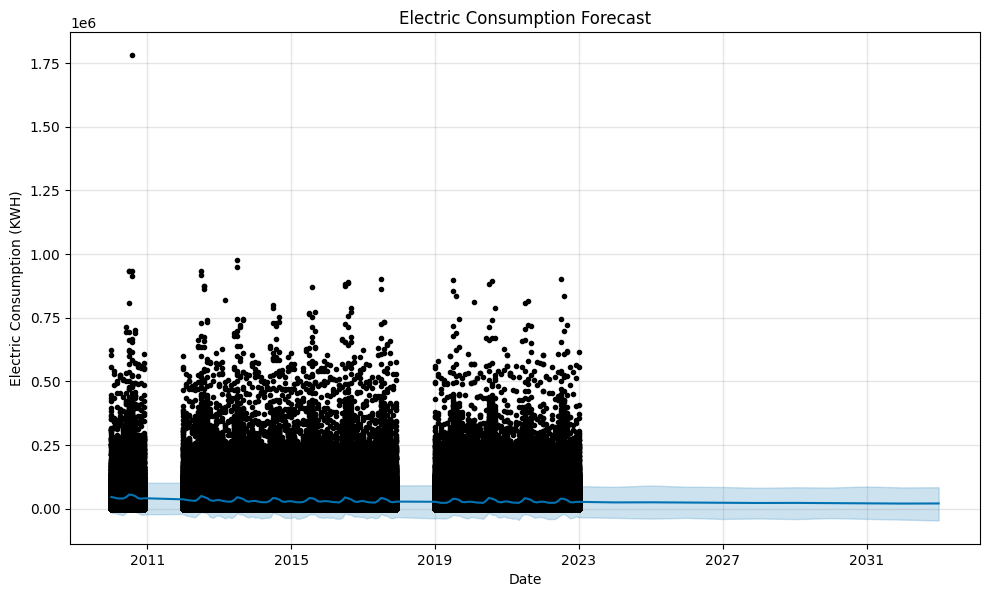

In [ ]:
# Future predictions 10 year
future_10_year = model.make_future_dataframe(periods=10, freq='y')
forecast_10_year = model.predict(future_10_year)

# Plot forecasted data for 10 year
fig = model.plot(forecast_10_year)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_10_Year = df_yearly['y'].values[:10]
forecasted_values_10_Year = forecast_10_year['yhat'].values[:10]

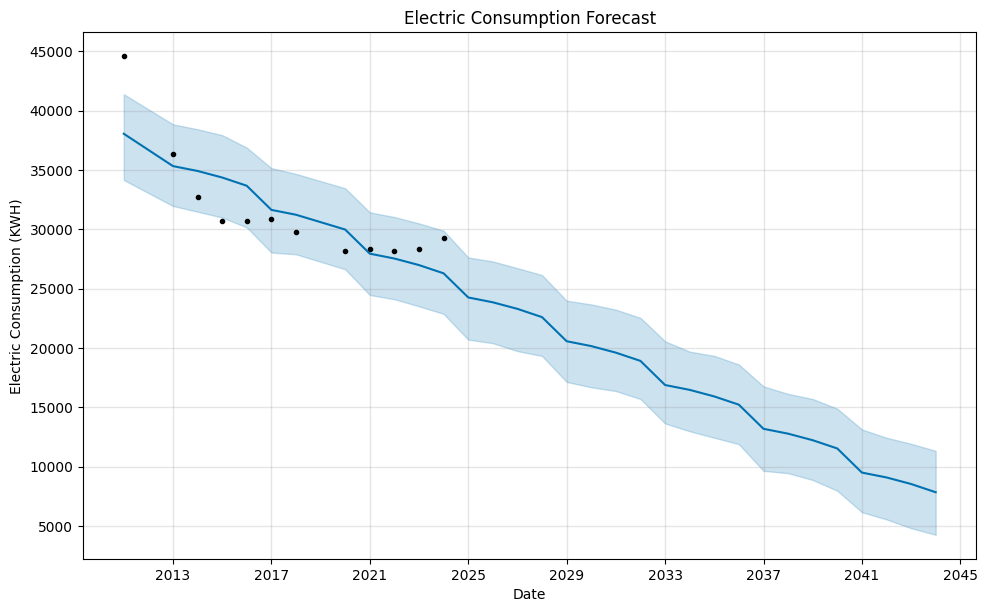

In [ ]:
# Future predictions 20 year
future_20_year = model.make_future_dataframe(periods=20, freq='y')
forecast_20_year = model.predict(future_20_year)

# Plot forecasted data for 20 year
fig = model.plot(forecast_20_year)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_20_Year = df_yearly['y'].values[:20]
forecasted_values_20_Year = forecast_20_year['yhat'].values[:20]

3) a) Forecasting growth: Plausible values = logistic; linear; flat

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/pyu782fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/4kv43sg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11121', 'data', 'file=/tmp/tmpcv0yp8zg/pyu782fa.json', 'init=/tmp/tmpcv0yp8zg/4kv43sg9.json', 'output', 'file=/tmp/tmpcv0yp8zg/prophet_model2or63ceh/prophet_model-20240506223341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:33:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


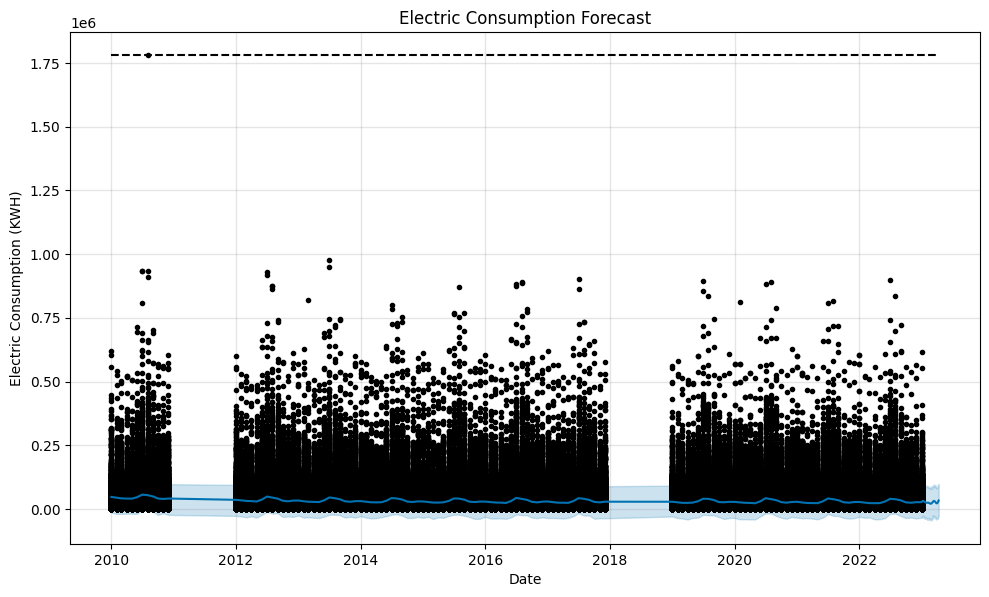

In [ ]:
dtype_dict = {'Meter Number': 'O'}
df = pd.read_csv('/content/sample_data/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240505.csv',dtype=dtype_dict, low_memory=False)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'])

# Defined the higest value of the Consumption as capacity constant

df['cap'] = df['Consumption (KWH)'].max()
df.rename(columns={'Revenue Month': 'ds', 'Consumption (KWH)': 'y'}, inplace=True)

# Create a Prophet model with forcasting growth='logistic'
model = Prophet(growth='logistic')

# Fit the model to your data
model.fit(df)

# Future predictions for 100 days
future = model.make_future_dataframe(periods=100)
future['cap'] = df['y'].max()
forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_Forecasting_growth = df['y'].values[:100]
forecasted_values_Forecasting_growth = forecast['yhat'].values[:100]

3) b) Seasonality: Add manual seasonality by using the add_seasonality method.
Test it with various values for ‘period’ and ‘fourier_order’.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/ohch65mp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/64wm0n2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67814', 'data', 'file=/tmp/tmpcv0yp8zg/ohch65mp.json', 'init=/tmp/tmpcv0yp8zg/64wm0n2u.json', 'output', 'file=/tmp/tmpcv0yp8zg/prophet_modelxns6wmwr/prophet_model-20240506223644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:36:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:37:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


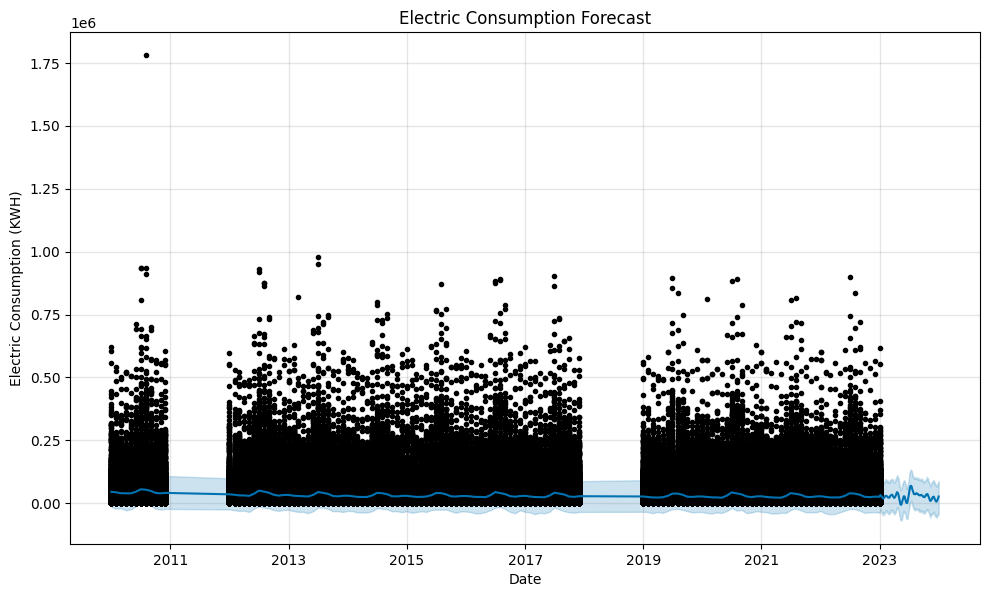

In [ ]:
dtype_dict = {'Meter Number': 'O'}
df = pd.read_csv('/content/sample_data/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240505.csv',dtype=dtype_dict, low_memory=False)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'])

df.rename(columns={'Revenue Month': 'ds', 'Consumption (KWH)': 'y'}, inplace=True)

model = Prophet()

#Manual seasonality 1
model.add_seasonality(name='custom_seasonality_1', period=30, fourier_order=5)

# Fit the model to your data
model.fit(df)

# Future predictions for 365 days
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actaul_values_Seasonality = df['y'].values[:365]
forecasted_values_Seasonality = forecast['yhat'].values[:365]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/boudu3cn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/zs6_3i_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1762', 'data', 'file=/tmp/tmpcv0yp8zg/boudu3cn.json', 'init=/tmp/tmpcv0yp8zg/zs6_3i_0.json', 'output', 'file=/tmp/tmpcv0yp8zg/prophet_model5nyo05gt/prophet_model-20240506221949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


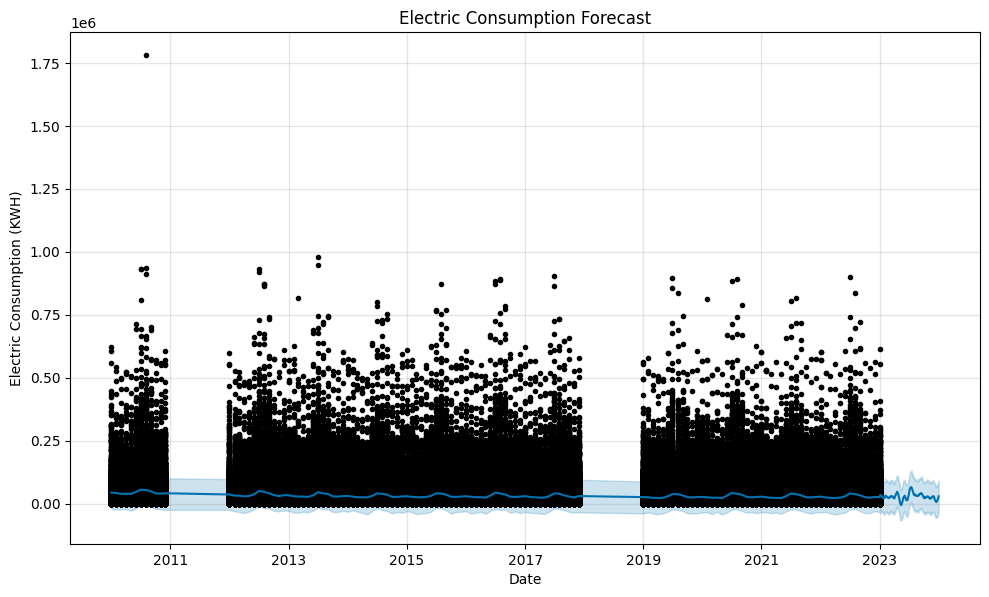

In [ ]:
#Manual seasonality 2

model = Prophet()

model.add_seasonality(name='custom_seasonality_2', period=60, fourier_order=10)

# Fit the model to your data
model.fit(df)

# Future predictions for 365 days
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

3) c) Trend Changepoints: Tune the ‘n_changepoints’ and
‘changepoit_prior_scale’ arguments/parameters

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/ap_4npu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcv0yp8zg/txp7lrz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86157', 'data', 'file=/tmp/tmpcv0yp8zg/ap_4npu7.json', 'init=/tmp/tmpcv0yp8zg/txp7lrz6.json', 'output', 'file=/tmp/tmpcv0yp8zg/prophet_modell20p5kf3/prophet_model-20240506223832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:38:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:39:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


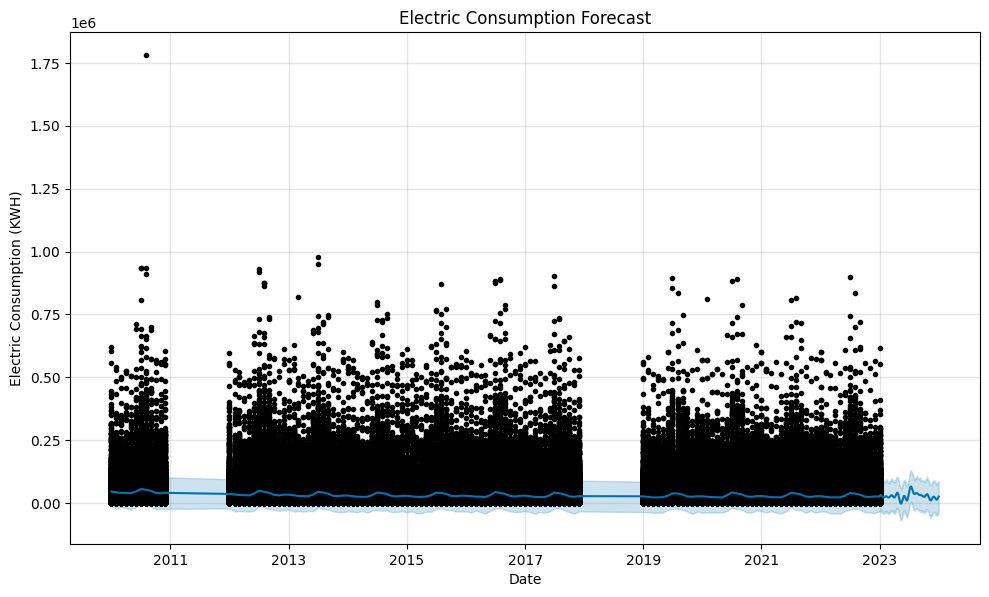

In [ ]:
#changepoit_prior_scale

dtype_dict = {'Meter Number': 'O'}
df = pd.read_csv('/content/sample_data/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240505.csv',dtype=dtype_dict, low_memory=False)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'])

df.rename(columns={'Revenue Month': 'ds', 'Consumption (KWH)': 'y'}, inplace=True)


model = Prophet(changepoint_prior_scale=0.5)


# Fit the model to your data
model.fit(df)

# Future predictions for 365 days
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

# Extract actual and predicted values for evaluation (4)
actual_values_Trend_Changepoint = df['y'].values[:365]
forecasted_values_Trend_Changepoint = forecast['yhat'].values[:365]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsizcebfp/el3nn4wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsizcebfp/fw89vk_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3254', 'data', 'file=/tmp/tmpsizcebfp/el3nn4wq.json', 'init=/tmp/tmpsizcebfp/fw89vk_6.json', 'output', 'file=/tmp/tmpsizcebfp/prophet_modelqiav4sok/prophet_model-20240505234056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:40:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


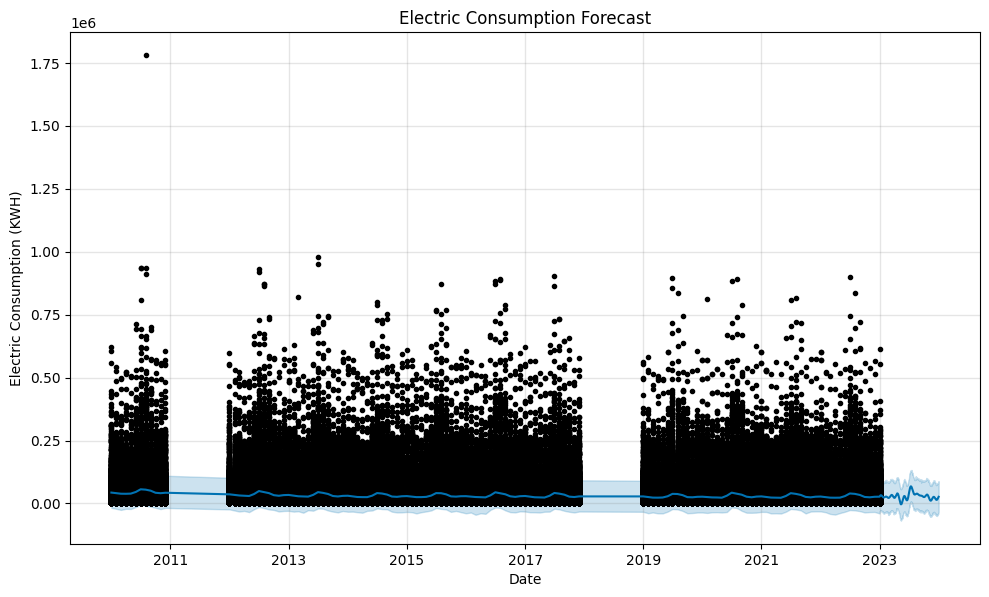

In [ ]:
#n_changepoints

model = Prophet(n_changepoints=50)


# Fit the model to your data
model.fit(df)

# Future predictions for 365 days
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

# Plot forecasted data
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Electric Consumption (KWH)')
plt.title('Electric Consumption Forecast')
plt.show()

4) Evaluate all models by providing their respective MAE (Mean Absolute Error) and
MAPE (Mean Absolute Percentage Error), as well as R^2 (use sklearn’s respective
metrics)

In [ ]:
# Calculate evaluation metrics for forecasted_values_100_Days
mae = mean_absolute_error(actual_values_100_Days, forecasted_values_100_Days)
mape = mean_absolute_percentage_error(actual_values_100_Days, forecasted_values_100_Days)
r_squared = r2_score(actual_values_100_Days, forecasted_values_100_Days)

# Print evaluation metrics for forecasted_values_100_Days
print(f"Mean Absolute Error (MAE) of forecasted_values_100_Days : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_100_Days: {mape}")
print(f"R-squared (R^2) of forecasted_values_100_Days : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_100_Days : 53862.136265698784
Mean Absolute Percentage Error (MAPE) of forecasted_values_100_Days: 2.3579599599255757e+18
R-squared (R^2) of forecasted_values_100_Days : -4.304180002886574


In [ ]:
# Calculate evaluation metrics for forecasted_values_200_Days
mae = mean_absolute_error(actual_values_200_Days, forecasted_values_200_Days)
mape = mean_absolute_percentage_error(actual_values_200_Days, forecasted_values_200_Days)
r_squared = r2_score(actual_values_200_Days, forecasted_values_200_Days)

# Print evaluation metrics for forecasted_values_200_Days
print(f"Mean Absolute Error (MAE) of forecasted_values_200_Days : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_200_Days: {mape}")
print(f"R-squared (R^2) of forecasted_values_200_Days : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_200_Days : 48623.7761505268
Mean Absolute Percentage Error (MAPE) of forecasted_values_200_Days: 7.546237789896067e+18
R-squared (R^2) of forecasted_values_200_Days : -2.483758253998081


In [ ]:
# Calculate evaluation metrics for forecasted_values_365_Days
mae = mean_absolute_error(actual_values_365_Days, forecasted_values_365_Days)
mape = mean_absolute_percentage_error(actual_values_365_Days, forecasted_values_365_Days)
r_squared = r2_score(actual_values_365_Days, forecasted_values_365_Days)

# Print evaluation metrics for forecasted_values_365_Days
print(f"Mean Absolute Error (MAE) of forecasted_values_365_Days : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_365_Days: {mape}")
print(f"R-squared (R^2) of forecasted_values_365_Days : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_365_Days : 41556.819232424576
Mean Absolute Percentage Error (MAPE) of forecasted_values_365_Days: 4.1349248163814067e+18
R-squared (R^2) of forecasted_values_365_Days : -1.0221954075707593


In [ ]:
# Calculate evaluation metrics for forecasted_values_1_Month
mae = mean_absolute_error(actual_values_1_Month, forecasted_values_1_Month)
mape = mean_absolute_percentage_error(actual_values_1_Month, forecasted_values_1_Month)
r_squared = r2_score(actual_values_1_Month, forecasted_values_1_Month)

# Print evaluation metrics for forecasted_values_1_Month
print(f"Mean Absolute Error (MAE) of forecasted_values_1_Month : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_1_Month: {mape}")
print(f"R-squared (R^2) of forecasted_values_1_Month : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_1_Month : 1583.683779066545
Mean Absolute Percentage Error (MAPE) of forecasted_values_1_Month: 0.034847570883580065
R-squared (R^2) of forecasted_values_1_Month : nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
# Calculate evaluation metrics for forecasted_values_6_Month
mae = mean_absolute_error(actual_values_6_Month, forecasted_values_6_Month)
mape = mean_absolute_percentage_error(actual_values_6_Month, forecasted_values_6_Month)
r_squared = r2_score(actual_values_6_Month, forecasted_values_6_Month)

# Print evaluation metrics for forecasted_values_6_Month
print(f"Mean Absolute Error (MAE) of forecasted_values_6_Month : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_6_Month: {mape}")
print(f"R-squared (R^2) of forecasted_values_6_Month : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_6_Month : 2234.988703637699
Mean Absolute Percentage Error (MAPE) of forecasted_values_6_Month: 0.056322085911262997
R-squared (R^2) of forecasted_values_6_Month : 0.7335600500907149


In [ ]:
# Calculate evaluation metrics for forecasted_values_9_Month
mae = mean_absolute_error(actual_values_9_Month, forecasted_values_9_Month)
mape = mean_absolute_percentage_error(actual_values_9_Month, forecasted_values_9_Month)
r_squared = r2_score(actual_values_9_Month, forecasted_values_9_Month)

# Print evaluation metrics for forecasted_values_9_Month
print(f"Mean Absolute Error (MAE) of forecasted_values_9_Month : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_9_Month: {mape}")
print(f"R-squared (R^2) of forecasted_values_9_Month : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_9_Month : 3438.3913309248983
Mean Absolute Percentage Error (MAPE) of forecasted_values_9_Month: 0.06926339695947727
R-squared (R^2) of forecasted_values_9_Month : 0.8063762999352246


In [ ]:
# Calculate evaluation metrics for forecasted_values_1_Year
mae = mean_absolute_error(actual_values_1_Year, forecasted_values_1_Year)
mape = mean_absolute_percentage_error(actual_values_1_Year, forecasted_values_1_Year)
r_squared = r2_score(actual_values_1_Year, forecasted_values_1_Year)

# Print evaluation metrics for forecasted_values_1_Year
print(f"Mean Absolute Error (MAE) of forecasted_values_1_Year : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_1_Year: {mape}")
print(f"R-squared (R^2) of forecasted_values_1_Year : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_1_Year : 6556.10635073571
Mean Absolute Percentage Error (MAPE) of forecasted_values_1_Year: 0.14695790595783695
R-squared (R^2) of forecasted_values_1_Year : nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
# Calculate evaluation metrics for forecasted_values_Forecasting_growth
mae = mean_absolute_error(actual_values_Forecasting_growth, forecasted_values_Forecasting_growth)
mape = mean_absolute_percentage_error(actual_values_Forecasting_growth, forecasted_values_Forecasting_growth)
r_squared = r2_score(actual_values_Forecasting_growth, forecasted_values_Forecasting_growth)

# Print evaluation metrics for forecasted_values_Forecasting_growth
print(f"Mean Absolute Error (MAE) of forecasted_values_Forecasting_growth : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_Forecasting_growth: {mape}")
print(f"R-squared (R^2) of forecasted_values_Forecasting_growth : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_Forecasting_growth : 53808.09266001263
Mean Absolute Percentage Error (MAPE) of forecasted_values_Forecasting_growth: 2.44678041377256e+18
R-squared (R^2) of forecasted_values_Forecasting_growth : -4.295337143045647


In [ ]:
# Calculate evaluation metrics for forecasted_values_Seasonality
mae = mean_absolute_error(actaul_values_Seasonality, forecasted_values_Seasonality)
mape = mean_absolute_percentage_error(actaul_values_Seasonality, forecasted_values_Seasonality)
r_squared = r2_score(actaul_values_Seasonality, forecasted_values_Seasonality)

# Print evaluation metrics for forecasted_values_Seasonality
print(f"Mean Absolute Error (MAE) of forecasted_values_Seasonality : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_Seasonality: {mape}")
print(f"R-squared (R^2) of forecasted_values_Seasonality : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_Seasonality : 41490.98831190556
Mean Absolute Percentage Error (MAPE) of forecasted_values_Seasonality: 4.0018063937606323e+18
R-squared (R^2) of forecasted_values_Seasonality : -1.0335816719321151


In [ ]:
# Calculate evaluation metrics for forecasted_values_Trend_Changepoint
mae = mean_absolute_error(actual_values_Trend_Changepoint, forecasted_values_Trend_Changepoint)
mape = mean_absolute_percentage_error(actual_values_Trend_Changepoint, forecasted_values_Trend_Changepoint)
r_squared = r2_score(actual_values_Trend_Changepoint, forecasted_values_Trend_Changepoint)

# Print evaluation metrics for forecasted_values_Trend_Changepoint
print(f"Mean Absolute Error (MAE) of forecasted_values_Trend_Changepoint : {mae}")
print(f"Mean Absolute Percentage Error (MAPE) of forecasted_values_Trend_Changepoint: {mape}")
print(f"R-squared (R^2) of forecasted_values_Trend_Changepoint : {r_squared}")

Mean Absolute Error (MAE) of forecasted_values_Trend_Changepoint : 40896.248210969745
Mean Absolute Percentage Error (MAPE) of forecasted_values_Trend_Changepoint: 4.0863206568577725e+18
R-squared (R^2) of forecasted_values_Trend_Changepoint : -0.9811173674224798
